# Live Coding: GA Bagian 6

Versi ini telah memiliki komponen-komponen utama GA secara lengkap.
This version has complete components of genetic algorithm i.e. initialization, mutation, crossover and selection.

## Problem Definition
$\max f(x_1,x_2,x_3) = 4x_1 -x_1^2 + 3x_2 -x_2^2 +5x_3 -3x_3^2$

$3x_1 + 2x_2 +3x_3 \le 10$

$x_1 + 4x_2 + x_3 \le20$

$x_1 \ge 0, x_2 \ge 0, x_3 \ge 0$

## Code for functions and parameters

In [215]:
using DataFrames
using CSV
using Plots
# Inisialisasi
ukuranPopulasi=300
jumlah_generasi=200;
populasi=DataFrame(ones(ukuranPopulasi,4));# kolom pertama sampai 3 untuk gen. Kolom keempat untuk fitness value

function fitness(x)
    # x adalah individu
    hasil=4*x[1]-x[1]^2 + 3*x[2]-x[2]^2 +5*x[3]-3*x[3]^2
    return hasil
end

function hitungFitness(populasi)
    populasi[:,4]=[fitness(i) for i in eachrow(populasi)]
    return populasi
end


function acakGen(populasi)
    populasi=DataFrame(rand(range(0,stop=2,step=0.0001),size(populasi)))
    # rand(range(-100,stop=100,step=0.000001),size(first(populasi)))
    hitungFitness(populasi)
    return populasi
end
function mutasi(populasi,mutation_rate=0.95)
        jumlahMutasi=round(size(populasi)[1]*mutation_rate)
        #print("jumlah mutasi ",jumlahMutasi," ")
        #himpunan=range(-1,stop=1,step=0.001)
        for i in range(1,stop=jumlahMutasi)
           push!(populasi,rand(range(0,stop=2,step=0.000001),size(first(populasi))))            
        end
        populasi=hitungFitness(populasi)
    return populasi
end 
function findCandidates(n_candidate)
        dataacak=rand(range(0,stop=10,step=0.000001),(1000*n_candidate,4))
        df=DataFrame(ones(1,4)) # tempat menyimpan data feasible
        sample=[ push!(df,i) for i in eachrow(dataacak) if (3*i[1]+2*i[2]+3*i[3]<=10) 
                            & (i[1] + 4*i[2] + i[3] <=20) & (i[1] >=0 & (i[2]>=0 & (i[3]>=0)))];
        deleterows!(df,1) # the first row are ones.
        return first(df,n_candidate)
end 
function switchRows(populasi,tworows)
    # switch the values of column 2 and 3
    r1,r2=tworows
    a=populasi[r1,2]
    b=populasi[r1,3]
    populasi[r1,2]=populasi[r2,2]
    populasi[r1,3]=populasi[r2,3]
    populasi[r2,2]=a
    populasi[r2,3]=b
    return populasi
end
function crossover(populasi,Pco=1)
    jumlahCO=round(Pco*size(populasi)[1])#Jumlah cros over
    cpopulasi=copy(populasi)
    for i in range(1,stop=jumlahCO)
        twoRows=rand(range(1,stop=size(cpopulasi)[1]),2)
        switchRows(cpopulasi,twoRows)
        children=copy(cpopulasi[twoRows,:])
        [ push!(populasi,i) for i in eachrow(children) if isFeasible(i)]
    end
                
    return populasi
end
function isFeasible(i)
    hasil=(3*i[1]+2*i[2]+3*i[3]<=10) & (i[1] + 4*i[2] + i[3] <=20) & (i[1] >=0 & (i[2]>=0 & (i[3]>=0)))
    return hasil
end     

isFeasible (generic function with 1 method)

# Code for the main loop of GA

In [216]:
populasi=findCandidates(ukuranPopulasi)
# Loop GA
populasi=hitungFitness(populasi)
terbaik=DataFrame(first(populasi))
for i in range(1,stop=jumlah_generasi,step=1)
    #print("\nGenerasi ke ")
    #print(i)
    #print(" ")
    
    # 1. Evaluasi Individu
    # print("\n\n Hitung Fitness\n")
    populasi=hitungFitness(populasi)
    # print("\n\nUrutkan\n")
    # 2. Mutasi
    mutasi(populasi,0.75)
    # 3. Cross over
    populasi=crossover(populasi)
    # Selection
    populasi=DataFrame([ i for i in eachrow(populasi) if isFeasible(i)])
    populasi=hitungFitness(populasi)
    sort!(populasi,4,rev=true) # column 4 is where fitness values are stored.
    populasi=first(populasi,ukuranPopulasi)
    t=first(populasi)# untuk minimalisasi gunakan first
    push!(terbaik,t)
end





In [321]:
## Plotting the fitness value of the best individu of each generation

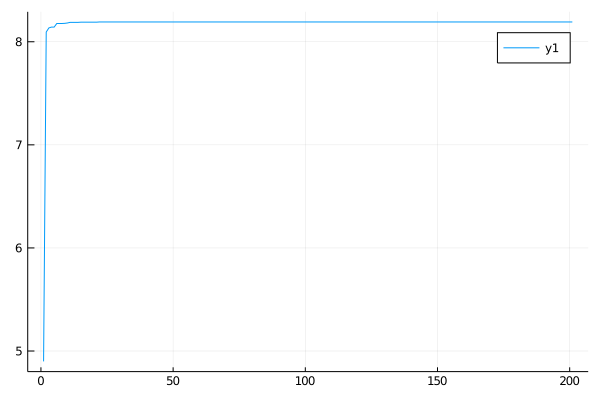

In [217]:
plot(terbaik.x4)
#acakGen(terbaik)


## Listing the best individu for each generation
x1,x2,x3 are $x_1, x_2, x_3$, respectively. x4 is the objective function $f(x$.

In [218]:
print(last(terbaik,100))

100×4 DataFrame
│ Row │ x1      │ x2      │ x3      │ x4      │
│     │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 2   │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 3   │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 4   │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 5   │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 6   │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 7   │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 8   │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 9   │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 10  │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 11  │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 12  │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 13  │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 14  │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 15  │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 16  │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 17  │ 1.7306  │ 1.3177  │ 0.7241  │ 8.19173 │
│ 18  │ 1.7306  │ 1.3177

## Saving results on a file

In [219]:
output="terbaik.csv"
CSV.write(output, last(terbaik,1),append=true)

"terbaik.csv"